In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook 
# import seaborn as sns

# sns.set(style='whitegrid', context='notebook')
# sns.reset_orig()

import pandas as pd
import numpy as np



## 一、numpy用法举例


### 1.array：基本的数组类型


In [8]:
np.array(object=[[1, 9, 9, 1], [2, 0, 1, 6]], dtype=np.float32)


array([[1., 9., 9., 1.],
       [2., 0., 1., 6.]], dtype=float32)

### 2.zeros：生成值为0的数组



In [9]:
np.zeros(shape=(2, 4), dtype=int)


array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

### 3.arange：数组生成（开始，结尾，步长）

In [10]:
np.arange(start=1.5, stop=8.5, step=0.7, dtype=float)


array([1.5, 2.2, 2.9, 3.6, 4.3, 5. , 5.7, 6.4, 7.1, 7.8])

### 4.求和：sum

In [11]:
vals = np.arange(0, 12, 1).reshape((3, 4))
print(vals)
print('')
print('sum entire array =', np.sum(vals))
print('sum along columns =', np.sum(vals, axis=0))
print('sum along rows =', np.sum(vals, axis=1))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

sum entire array = 66
sum along columns = [12 15 18 21]
sum along rows = [ 6 22 38]


## 二、pandas用法举例

### 1.DataFrame:表格型数据结构

In [12]:
df = pd.DataFrame(data={'y': [1, 2, 3],
                       'score': [93.5, 89.4, 90.3],
                       'name': ['Dirac', 'Pauli', 'Bohr'],
                       'birthday': ['1902-08-08', '1900-04-25', '1895-10-07']})
print(type(df))
print(df.dtypes)
df


<class 'pandas.core.frame.DataFrame'>
y             int64
score       float64
name         object
birthday     object
dtype: object


,y,score,name,birthday
0,1,93.5,Dirac,1902-08-08
1,2,89.4,Pauli,1900-04-25
2,3,90.3,Bohr,1895-10-07


### 2.read_csv：读取csv数据方法

In [15]:
df.to_csv("./test.csv")


In [17]:
df = pd.read_csv("./test.csv")
df


,Unnamed: 0,y,score,name,birthday
0,0,1,93.5,Dirac,1902-08-08
1,1,2,89.4,Pauli,1900-04-25
2,2,3,90.3,Bohr,1895-10-07


### 3.Series：类似于一维数组的对象

In [18]:
items = pd.Series(data=[93.5, 89.4, 90.3], name='score')
print(type(items))
items


<class 'pandas.core.series.Series'>


0    93.5
1    89.4
2    90.3
Name: score, dtype: float64

### 4.concat:合并不同的轴数据

In [20]:
items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')
print('')
print(items2)
print('')
print('按列合并到一起:')
print(pd.concat(objs=[items, items2], axis=0))
print('')
print('按行合并到一起:')
print(pd.concat(objs=[items, items2], axis=1))



0    1902-08-08
1    1900-04-25
Name: birthday, dtype: object

按列合并到一起:
0          93.5
1          89.4
2          90.3
0    1902-08-08
1    1900-04-25
dtype: object

按行合并到一起:
   score    birthday
0   93.5  1902-08-08
1   89.4  1900-04-25
2   90.3         NaN


In [21]:
df

,Unnamed: 0,y,score,name,birthday
0,0,1,93.5,Dirac,1902-08-08
1,1,2,89.4,Pauli,1900-04-25
2,2,3,90.3,Bohr,1895-10-07


In [22]:
pd.to_datetime(arg=df.birthday, format='%Y-%m-%d')

0   1902-08-08
1   1900-04-25
2   1895-10-07
Name: birthday, dtype: datetime64[ns]

### 5.merge:数据合并

In [23]:
df_new = pd.DataFrame(data=list(zip(['Dirac', 'Pauli', 'Bohr', 'Einstein'],
                                    [True, False, True, True])),
                      columns=['name', 'friendly'])

df_merge = pd.merge(left=df, right=df_new, on='name', how='outer')
df_merge


,Unnamed: 0,y,score,name,birthday,friendly
0,0.0,1.0,93.5,Dirac,1902-08-08,True
1,1.0,2.0,89.4,Pauli,1900-04-25,False
2,2.0,3.0,90.3,Bohr,1895-10-07,True
3,NaN,NaN,NaN,Einstein,NaN,True


## 三、matplotlib用法举例

### 1. 折线图

<IPython.core.display.Javascript object>


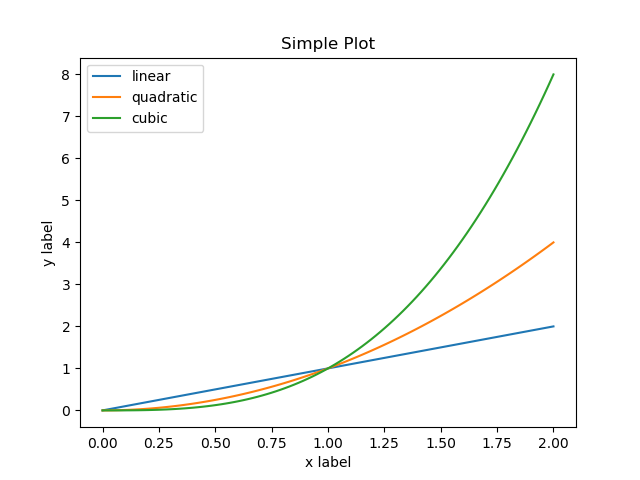

In [38]:
x= np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend();





### 2.散点图

In [37]:
x = np.arange(0., 5., 0.2)

# 红色破折号, 蓝色方块 ，绿色三角块
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.show()




### 3. 直方图

<IPython.core.display.Javascript object>


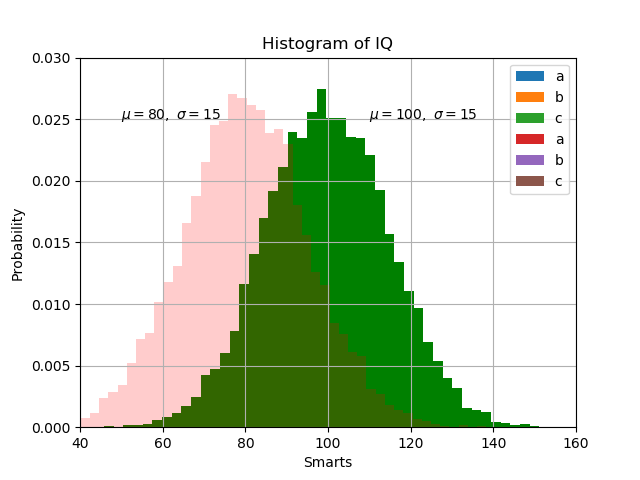

Text(0.5, 0, 'Smarts')

Text(0, 0.5, 'Probability')

Text(0.5, 1.0, 'Histogram of IQ')

Text(110, 0.025, '$\\mu=100,\\ \\sigma=15$')

Text(50, 0.025, '$\\mu=80,\\ \\sigma=15$')

[40, 160, 0, 0.03]

In [32]:
np.random.seed(19680801)

mu1, sigma1 = 100, 15
mu2, sigma2 = 80, 15
x1 = mu1 + sigma1 * np.random.randn(10000)
x2 = mu2 + sigma2 * np.random.randn(10000)

# the histogram of the data
# 50：将数据分成50组
# facecolor：颜色；alpha：透明度
# density：是密度而不是具体数值
n1, bins1, patches1 = plt.hist(x1, 50, density=True, facecolor='g', alpha=1)
n2, bins2, patches2 = plt.hist(x2, 50, density=True, facecolor='r', alpha=0.2)

# n：概率值；bins：具体数值；patches：直方图对象。

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')

plt.text(110, .025, r'$\mu=100,\ \sigma=15$')
plt.text(50, .025, r'$\mu=80,\ \sigma=15$')

# 设置x，y轴的具体范围
plt.axis([40, 160, 0, 0.03])
plt.grid(True)